<a href="https://colab.research.google.com/github/junhansong/deeplearning/blob/master/deeplearning/run_project/10_Wine_Overfit_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 호출


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf



# seed 값 설정


In [0]:
numpy.random.seed(3)
tf.random.set_seed(3)



### 데이터 로딩


In [0]:
df_pre = pd.read_csv('https://raw.githubusercontent.com/junhansong/deeplearning/master/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)



### 데이터 셋 분리


In [0]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]



### 모델의 설정


In [0]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



### 모델 컴파일


In [0]:
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])



### 모델 저장 폴더 설정


In [0]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)



### 모델 저장 조건 설정


In [0]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)



### 모델 실행 및 저장


In [20]:
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
653/653 [==============================] - 0s 16us/step - loss: 0.0406 - accuracy: 0.9832 - val_loss: 0.0856 - val_accuracy: 0.9720
Epoch 1002/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0405 - accuracy: 0.9832 - val_loss: 0.0840 - val_accuracy: 0.9720
Epoch 1003/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0421 - accuracy: 0.9832 - val_loss: 0.0839 - val_accuracy: 0.9752
Epoch 1004/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0403 - accuracy: 0.9832 - val_loss: 0.0875 - val_accuracy: 0.9752
Epoch 1005/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0412 - accuracy: 0.9816 - val_loss: 0.0862 - val_accuracy: 0.9752
Epoch 1006/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0392 - accuracy: 0.9816 - val_loss: 0.0846 - val_accuracy: 0.9752
Epoch 1007/3500
653/653 [==============================] - 0s 13us/step - loss: 0.0402 - acc

### y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장


In [0]:
y_vloss=history.history['val_loss']



### y_acc 에 학습 셋으로 측정한 정확도의 값을 저장


In [0]:
y_acc=history.history['accuracy']

### x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시


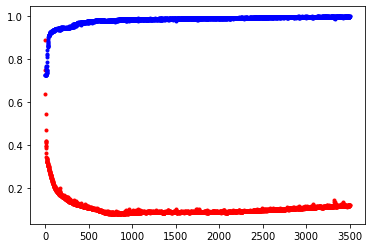

In [22]:
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()
